In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [18]:
my_data=pd.read_csv(r"F:\databases\winequality-red.csv")
my_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
my_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
my_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
X=my_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
X[0:5]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
y=my_data['quality'].values
y[0:5]

array([5, 5, 5, 6, 5], dtype=int64)

In [23]:
X,y=shuffle(X,y)

In [24]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.1261883 ,  1.91157769, -1.39147228, -0.24037503, -0.07367691,
        -0.56182328, -0.47035959, -0.09894252, -0.39596939, -0.93328498,
        -0.58477711, -0.78782264],
       [ 0.27598301, -1.27271396,  0.55984528, -0.16942723, -0.58376624,
         0.29885363,  0.77640806, -0.69785799,  0.51112954,  0.36500271,
         1.29256787,  0.45084835],
       [ 1.08032563, -0.93752536,  1.8949573 ,  0.25625952,  0.73396452,
        -0.56182328, -0.16626992,  0.6642772 , -0.52555495,  0.01092425,
         1.94963861,  0.45084835],
       [-0.35600048,  0.90601191,  1.12470036, -0.5241662 ,  0.58518847,
         0.39448439,  1.99276675,  0.02826077, -0.65514052,  0.30598963,
        -1.05411336, -0.78782264],
       [ 0.27598301, -0.43474247,  0.81659759, -0.80795737, -0.24370669,
        -0.37056175, -0.77444926, -0.6554569 , -0.65514052,  0.54204194,
        -0.20930812,  0.45084835]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1279, 12) (1279,)
Test set: (320, 12) (320,)


In [26]:
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [27]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([5, 5, 7, 5, 6], dtype=int64)

In [28]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9327599687255669
Test set Accuracy:  0.896875


In [29]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

 #Train Model and Predict
 neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
 yhat=neigh.predict(X_test)
 mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

 std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.903125, 0.903125, 0.8875  , 0.896875, 0.903125, 0.890625,
       0.89375 , 0.88125 , 0.875   ])

In [30]:
std_acc

array([0.01653502, 0.01653502, 0.01766385, 0.01700094, 0.01653502,
       0.01744743, 0.01722652, 0.01808387, 0.01848775])

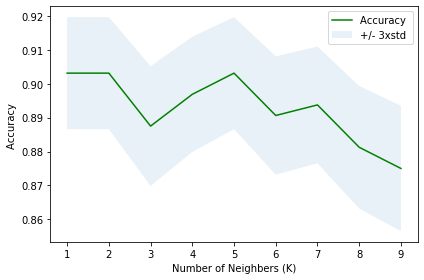

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbers (K)')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.903125 with k= 1
